In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import random
import math

In [2]:
# Load data file
df4 = pd.read_csv('/content/pdata.csv')
df4.head()

,gene_id,gene_name,gene_type,H358_Pooled,H358_SC05,H358_SC09,H358_SC10,H358_SC11,H358_SC12,H358_SC14,H358_SC16,H358_SC17,H358_SC18,H358_SC23,H358_SC24,H358_SC25,H358_SC29,H358_SC32,H358_SC34,H358_SC38,H358_SC39,H358_SC42,H358_SC44,H358_SC52,H358_SC53,H358_SC55,H358_SC57,H358_SC59,H358_SC62,H358_SC63,H358_SC65,H358_SC67,H358_SC68,H358_SC69,H358_SC70,H358_SC71,H358_SC73,H358_SC74,H358_SC75,H358_SC76,...,LC-MBT-15_SC34,LC-MBT-15_SC41,LC-MBT-15_SC42,LC-MBT-15_SC45,LC-MBT-15_SC50,LC-MBT-15_SC51,LC-MBT-15_SC52,LC-MBT-15_SC54,LC-MBT-15_SC55,LC-MBT-15_SC56,LC-MBT-15_SC57,LC-MBT-15_SC58,LC-MBT-15_SC59,LC-MBT-15_SC60,LC-MBT-15_SC62,LC-MBT-15_SC63,LC-MBT-15_SC64,LC-MBT-15_SC65,LC-MBT-15_SC67,LC-MBT-15_SC71,LC-MBT-15_SC72,LC-MBT-15_SC73,LC-MBT-15_SC74,LC-MBT-15_SC75,LC-MBT-15_SC76,LC-MBT-15_SC78,LC-MBT-15_SC79,LC-MBT-15_SC80,LC-MBT-15_SC84,LC-MBT-15_SC85,LC-MBT-15_SC87,LC-MBT-15_SC89,LC-MBT-15_SC92,LC-MBT-15_SC94,LC-MBT-15_SC95,LC-MBT-15_SC96,LC-PT-45-mock,LC-PT-45-Selumetinib_R0,LC-PT-45-Selumetinib_R3,LC-PT-45-Selumetinib_R7
0,ENSG00000237851.1,RP1-67K17.4,lincRNA,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
1,ENSG00000225538.1,OR5BE1P,pseudogene,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
2,ENSG00000257527.1,MIR3179-3,lincRNA,5.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,10.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.04,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.59,0.0,1.62
3,ENSG00000212855.5,TTTY2,lincRNA,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
4,ENSG00000225193.5,RPS12P26,pseudogene,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.47,0.0,0.0,0.0,0.0,0.0,20.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,24.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.00,0.0,0.00


In [3]:
from sklearn import svm
varl = pd.DataFrame(df4.values[:, 3:], columns=[str(i) for i in range(201)])
ssd = []

for idx,i in enumerate(varl.values):
  # print(i[199:201])
  a = i[1:51]
  b = i[57:91]
  c = i[98:141]
  d = i[148:197]
  ssd.append(np.concatenate((a,b,c,d),axis=0))

In [4]:
X = pd.DataFrame(ssd[0:20])
# print(X,varl.values.shape[0])
# y = [i for i in range(varl.values.shape[0])]
y = [i for i in range(20)]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [5]:
ay = []
by = []
cy = []
dy = []
for i in range(50):
  r = random.random()
  if r < 0.79:
    ay.append(1)
  else:
    ay.append(-1)
for i in range(34):
  r = random.random()
  if r < 0.79:
    by.append(1)
  else:
    by.append(-1)
for i in range(43):
  r = random.random()
  if r < 0.76:
    cy.append(1)
  else:
    cy.append(-1)
for i in range(49):
  r = random.random()
  if r < 0.67:
    dy.append(1)
  else:
    dy.append(-1)

z = np.concatenate((np.zeros(1), np.array(ay), np.zeros(6), np.array(by), np.zeros(7), np.array(cy), np.zeros(7), np.array(dy), np.zeros(4)),axis=0)
print(z.shape)

(201,)


In [6]:
from sklearn import svm
prog = np.array(['ADM', 'AGFG1', 'AKAP12', 'ALDOA', 'ATP2B1', 'BAG1', 'BBS9', 'CASP4', 'CDS1', 'CKAP4', 'CRK', 'CSTB', 'CYP24A1', 'DBP', 'DEFB1', 'EIF1', 'ERBB2', 'FADD', 'FEZ2', 'FUCA1', 'FURIN', 'FUT3', 'GAPDH', 'GARS', 'GRB7', 'H2AFZ', 'HLA-B', 'HMBS', 'HPCAL1', 'ITGA2', 'KIAA0020', 'KLF10', 'KLF6', 'KRT18', 'KRT19', 'KRT7', 'KYNU', 'LAMB1', 'MT2A', 'NACA', 'NME2', 'P2RX5', 'PDAP1', 'PEX7', 'PNP', 'POLD3', 'PPIF', 'PRDM2', 'RELA', 'RND3', 'RPS26', 'RPS3', 'S100P', 'SERPINE1', 'SLC20A1', 'SLC2A1', 'STARD3', 'STC1', 'STX1A', 'TMF1', 'TPBG', 'TRA2A', 'TUBA1A', 'UBC', 'UGP2', 'UQCRC2', 'VDAC2', 'VEGFA', 'WNT10B'])
bcoff = np.array(['0.49543109','0.517065185','0.223387459','0.730284082','0.265362566','0.339547967','-0.444179747','0.471969179','0.20240405','0.687378019','0.824631112','0.434494698','0.229358887','-0.607481943','0.20431928','1.34197326','0.506775858','0.932348021','0.494280815','-0.522782774','0.294366702','0.283851344','1.198806291','0.317607817','0.388224162','0.578559141','-0.328096212','0.523554863','0.317855967','0.221879846','0.506902733','0.606156603','0.420547127','0.772545759', '0.587675344','0.541900569','0.335305455','0.344157417','0.001182098','1.090014157','0.528071671','-0.634637838','0.701976062','1.158165138','0.405761129','0.513944626','0.419229827','-0.362480124','0.400380983','0.262311884','0.43534389','1.054384799','0.193936968','0.242050943','0.258292674','0.512845564','0.126666652','0.318349801','0.405409309','1.066991244','0.708345035','-0.773184322','-0.129622298','-0.024646261','0.935087473','0.5911256','0.426102321','0.54771902','0.606014977'])
bcoff = bcoff.astype(np.float)

rsd = df4[df4['gene_name'].isin(prog)].iloc[:,1:]
rsd = rsd.sort_values('gene_name')
rsd.drop(rsd.columns[[0,1]], axis = 1, inplace = True)
rsd.columns = [str(i) for i in range(201)]
rs = []
# for i in rsd
for (colname,colval) in rsd.iteritems():
    m = np.multiply(bcoff,np.array(colval.values))
    rs.append(np.sum(m))
rs = np.array(rs)
lrsy = []
hrsy = []
lrsn = []
hrsn = []
print(rs.shape)
for idx,i in enumerate(rs):
  if idx == 0 or (idx >=51 and idx < 57) or (idx >=91 and idx < 98) or (idx >=141 and idx < 148) or idx >= 197:
    rs[idx] = 0

ars = []
for i in rs:
  if i != 0:
    ars.append(i)

ars = np.array(ars)
kars = pd.DataFrame(df4.iloc[32175, 3:])
sixp = np.percentile(ars, 60)

for idx,i in enumerate(rs):
  if i < sixp:
    if z[idx] == 1:
      lrsy.append((idx, i))
    elif z[idx] == -1:
      lrsn.append((idx, i))
  else:
    if z[idx] == 1:
      hrsy.append((idx, i))
    elif z[idx] == -1:
      hrsn.append((idx, i))

(201,)


In [7]:
val = df4.values
print(val.shape)
fin = []
a = []
b = []
c = []
d = []
done = []
for i in range(3):
  t = True
  while(t):
    r = random.randint(0,len(lrsn)-1)
    if r not in done:
      a.append(lrsn[r][0])
      t = False
      done.append(r)
a = np.array(a)
done = []
for i in range(25):
  t = True
  while(t):
    r = random.randint(0,len(lrsy)-1)
    if r not in done:
      b.append(lrsy[r][0])
      t = False
      done.append(r)
b = np.array(b)
done = []
for i in range(3):
  t = True
  while(t):
    r = random.randint(0,len(hrsn)-1)
    if r not in done:
      c.append(hrsn[r][0])
      t = False
      done.append(r)
c = np.array(c)
done = []
for i in range(35):
  t = True
  while(t):
    r = random.randint(0,len(hrsy)-1)
    if r not in done:
      d.append(hrsy[r][0])
      t = False
      done.append(r)
fini = np.concatenate((a,b,c,d), axis=0)

(57820, 204)


In [8]:
d = np.array(d)
ndf = pd.DataFrame(df4.iloc[:,3:].values, columns=[str(i) for i in range(201)])
findf = ndf[[str(i) for i in fini]]
fin = findf.values
y = np.array([0]*3)
z = np.array([1]*25)
y = np.concatenate((y,z), axis=0)
z = np.array([2]*3)
y = np.concatenate((y,z), axis=0)
z = np.array([3]*35)
y = np.concatenate((y,z), axis=0)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled_data = StandardScaler().fit_transform(fin)
pca=PCA().fit_transform(scaled_data)

data_pca_df = pd.DataFrame(pca)
data_pca_df.head()
print(data_pca_df.shape)

(57820, 66)


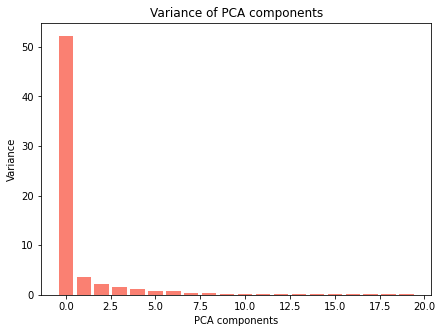

In [14]:
plt.rcParams["figure.figsize"] = (7,5)
var_pca = np.var(pca,axis=0)
x_var_pca = np.array([i for i in range(20)])
#Creating the column plot 
plt.bar(x_var_pca,var_pca[0:20],color='salmon') 
#Adding the aesthetics
plt.title('Variance of PCA components')
plt.xlabel('PCA components')
plt.ylabel('Variance') 
#Show the plot
plt.show()

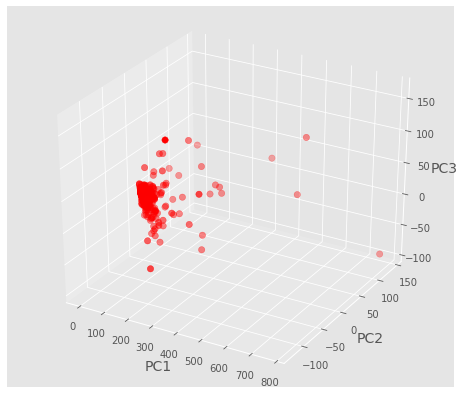

In [30]:
# Plot Fig.2 A : PCA Analysis
plt.style.use("ggplot")
from collections import defaultdict
Xax = pca[:,0]
Yax = pca[:,1]
Zax = pca[:,2]
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')
ax.scatter(Xax, Yax, Zax, s=40, c='red')
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)
# ax.legend()
plt.show()

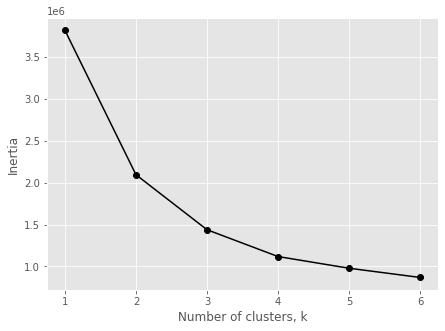

In [31]:
from sklearn.cluster import KMeans
inertias = []
nk = range(1,7)
for i in nk:
  kmeans = KMeans(n_clusters=i).fit(pca)
  inertias.append(kmeans.inertia_)

plt.plot(nk, inertias, '-o', color='black')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(nk)
plt.show()

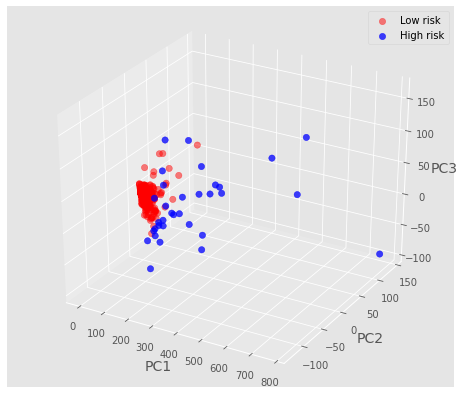

In [32]:
# Plot Fig. 2 B : K-Means clustering on PCA1,PCA2,PCA3
kmeans = KMeans(n_clusters=2, random_state=0).fit(pca[:,0:3])
labels = kmeans.labels_
centr = kmeans.cluster_centers_

u_labels = np.unique(labels)

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('white')
ll, colours,alp = ['Low risk','High risk'], ['red', 'blue'], [0.5,0.75]
# 'HRSK','HRSKW'], ['red', 'blue', 'orange', 'green']
for i in u_labels:
    ax.scatter(pca[labels == i , 0] , pca[labels == i , 1] , pca[labels == i , 2], label = ll[i], c=colours[i], s=40, alpha=alp[i])
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


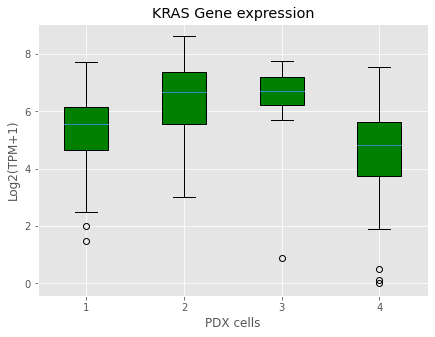

In [33]:
# Plot Fig. 3 : KRAS mutation signature in PDX cells
kars = pd.DataFrame(df4.iloc[32175, 3:])
kl = np.log2(kars.values.astype(float)+1).T.flatten()
klar = []
klar.append(kl[0:51])
klar.append(kl[51:91])
klar.append(kl[91:141])
klar.append(kl[141:201])
plt.boxplot(x=klar, patch_artist=True,boxprops=dict(facecolor="green"))
plt.title("KRAS Gene expression")
plt.xlabel("PDX cells")
plt.ylabel("Log2(TPM+1)")
plt.show()